In [1]:
# Last time: drawing graphs using networkx package 

In [7]:
import networkx as nx

In [8]:
import numpy as np 

In [9]:
G=nx.Graph(np.array([[0,1],[1,0]]))

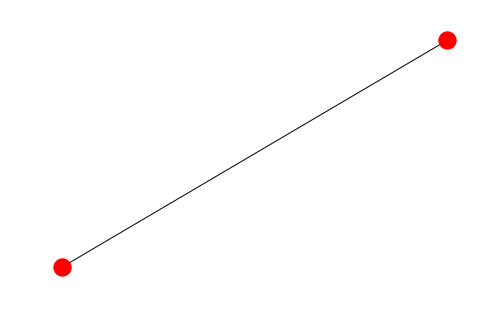

In [10]:
nx.draw(G) # WARNING: sometimes you have to run multiple times when start using networkx

In [13]:
# adjacency matrix should be symmetric A[i,j] = A[j,i] (since graph is undirected)
A = np.array([[0, 1, 0, 1],[1, 0, 1, 1],[0, 1, 0, 0],[1, 1, 0, 0]])

In [14]:
A

array([[0, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 0, 0],
       [1, 1, 0, 0]])

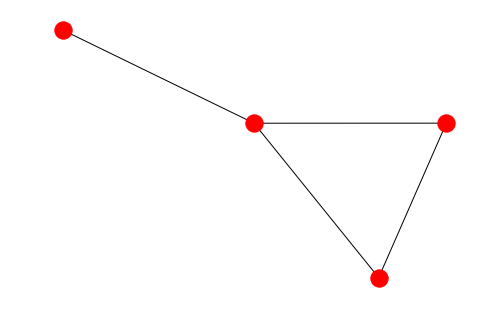

In [15]:
nx.draw(nx.Graph(A))

In [ ]:
# Many different ways of representing graphs computationally 
# Adjacency matrix is less efficient if graph is sparse (many vertices, few edges)

In [101]:
##############

In [ ]:
# Random walk on a graph

In [16]:
def rand_walk_graph(A,v,num_steps):
    """Do random walk on graph by adjacency matrix A (2 diml numpy array).
    Start at vertex v, go num_steps number of steps.
    Return ending vertex w."""
    w = v # current vertex; starts at v
    num_verts = len(A) # number of rows in matrix (=number of vertices)
    
    for n in range(num_steps):
        # first find list of neighbors of w
        neigh_list = [i for i in range(num_verts) if A[w,i]==1] 
        # choose one neighbor randomly, move w there
        w = neigh_list[randint(0,len(neigh_list)-1)]
    return w

In [31]:
rand_walk_graph(A,2,1) # one step random walk starting at 2 (only one choice)

1

In [43]:
rand_walk_graph(A,0,10)

0

In [44]:
# Q: What is distribution of end points when do a random walk with 
# large number of steps (starting from fixed vertex)?

In [46]:
[rand_walk_graph(A,0,10) for n in range(10)]

[1, 3, 3, 0, 1, 2, 1, 1, 3, 0]

In [47]:
import matplotlib.pyplot as plt

(array([243.,   0.,   0., 387.,   0.,   0., 131.,   0.,   0., 239.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

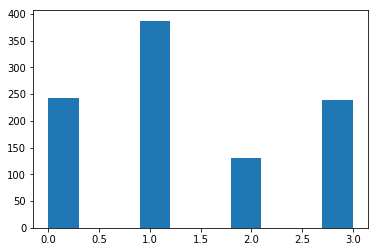

In [52]:
plt.hist([rand_walk_graph(A,0,51) for n in range(1000)])

In [50]:
# Above suggests that prob of landing at w is proportional to 
# number of edges emanating from w (aka degree(w))

In [102]:
# (False) Conjecture: For any connected graph, if we do random walk starting at fixed vertex,
# probability of ending at vertex w after a large number of steps 
# is nearly to proportional to degee of w.  

In [55]:
# Definition: A graph is connected if every two vertices can be joined by a path 
# of edges 

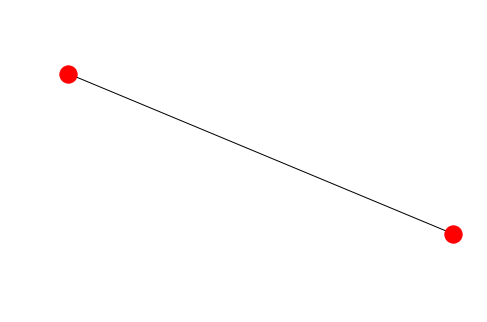

In [57]:
# Counterexample to above conjecture
A2 = np.array([[0,1],[1,0]])
nx.draw(nx.Graph(A2))

(array([   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

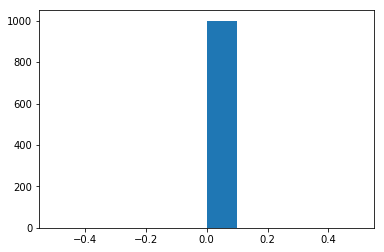

In [62]:
plt.hist([rand_walk_graph(A2,0,50) for n in range(1000)])
# always end up at starting point if num_steps is even

In [63]:
# Theorem: For any connected non-bipartite graph, if we do random walk starting at fixed vertex,
# probability of ending at vertex v after a large number of steps 
# is nearly to proportional to degee of v.  

In [ ]:
# Definition: A graph is bipartite if vertices can be divided into two classes such that
# there are no edges between vertices of the same class 

In [ ]:
# Above can be applied in many scenarios: e.g. card shuffling (vertices=orderings of cards,
# edges=pairs of orderings that differ by some basic shuffle) 

In [ ]:
###################

In [65]:
# Random graphs 
# Want: Control number of vertices, and also number of edges 
# (Fixed number of edges model)

In [67]:
import numpy as np 

def rand_graph(num_v, num_e):
    """Returns a random graph with num_v vertices and num_e edges.
    Represented as numpy array giving the adjacency matrix.
    Pick two vertices randomly, add an edge between if they're distinct, and
    they're not already connected by an edge. 
    Repeat this until we've added num_e edges."""
    A = np.zeros((num_v,num_v)) # adjacency matrix, starts of all zeros (no edges)
    e_so_far = 0 # number of edges added so far 
    
    while e_so_far < num_e: 
        # Choose two vertices randomly
        i = randint(0,num_v-1)
        j = randint(0,num_v-1)
        if i !=j and A[i,j]==0: # test if they're distinct and no edge already
            # add edge
            A[i,j]=1
            A[j,i]=1 # keeps matrix symmetric (undirected graph)
            e_so_far += 1
    # if num_e is too big, then loop will be infinite  
    return A

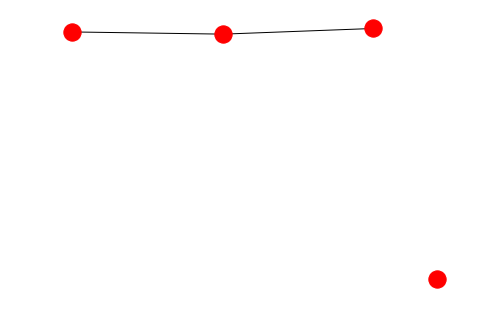

In [74]:
nx.draw(nx.Graph(rand_graph(4,2)))

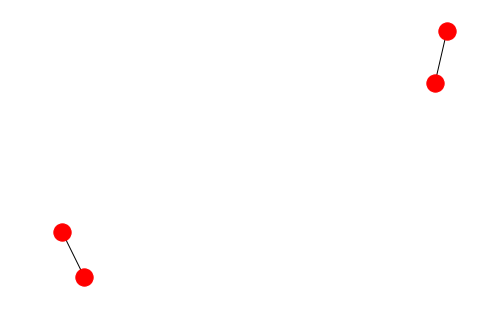

In [83]:
nx.draw(nx.Graph(rand_graph(4,2)))

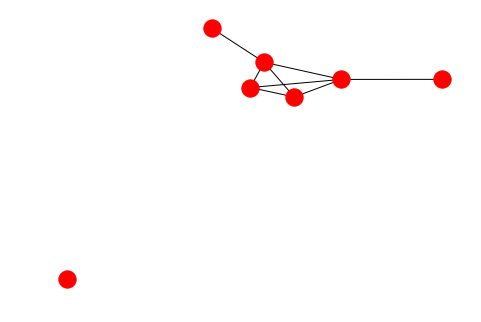

In [95]:
nx.draw(nx.Graph(rand_graph(7,8)))

In [96]:
# Q: What is maximum number of edges for a graph with n vertices?
# A: n*(n-1)/2 

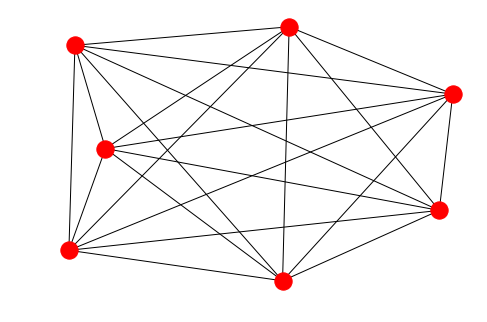

In [99]:
nx.draw(nx.Graph(rand_graph(7,21)))
# all possible edges 

In [100]:
nx.draw(nx.Graph(rand_graph(7,22)))
# goes into infinite loop since number of edges is too big.  

KeyboardInterrupt: 